# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup_mars = BeautifulSoup(html, 'html.parser')
soup_mars

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [5]:
# Extract all rows of data
table_data = soup_mars.find_all("tr", class_="data-row")
table_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_data_rows = []

# Loop through the scraped data to create a list of rows
for row in table_data: #*Need help from tutor*
    td_tags = row.find_all('td')
    row = [temp.text for temp in td_tags]
    table_data_rows.append(row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(table_data_rows, columns = ['id', 'terrstrial_data', 'sol', 'Is', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
mars_data_df

,id,terrstrial_data,sol,Is,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column
mars_data_df.dtypes

id                 object
terrstrial_data    object
sol                object
Is                 object
month              object
min_temp           object
pressure           object
dtype: object

In [10]:
# Change data types for data analysis
mars_data_df.terrstrial_data = pd.to_datetime(mars_data_df.terrstrial_data)
mars_data_df.sol = mars_data_df.sol.astype("int") 
mars_data_df.Is = mars_data_df.Is.astype("int")
mars_data_df.month = mars_data_df.month.astype("int")
mars_data_df.min_temp = mars_data_df.min_temp.astype("float")
mars_data_df.pressure = mars_data_df.pressure.astype("float")

In [11]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

id                         object
terrstrial_data    datetime64[ns]
sol                         int32
Is                          int32
month                       int32
min_temp                  float64
pressure                  float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_data_df.month.nunique()

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
mars_data_df.sol.nunique()

1867

In [16]:
# 3. What is the average minimum temperature by month?
min_temp = mars_data_df.groupby("month")["min_temp"].mean()
min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

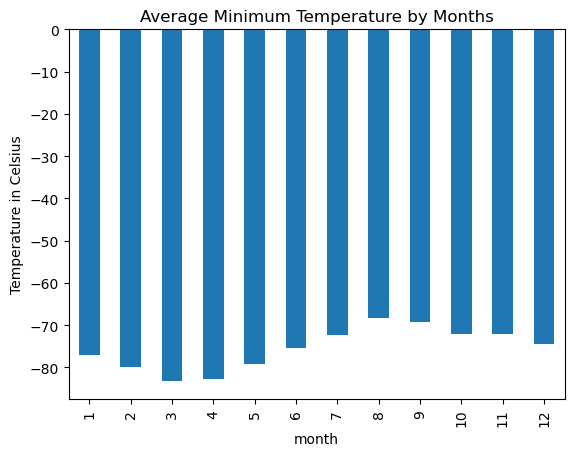

In [18]:
# Plot the average minimum temperature by month
min_temp.plot(kind = "bar")
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Months')
plt.show()

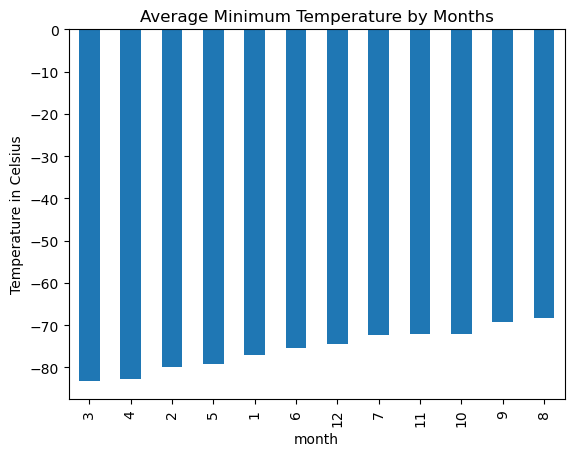

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
min_temp.sort_values().plot(kind = "bar")
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Months')
plt.show()

In [20]:
# 4. What is the average pressure by month?
pressure = mars_data_df.groupby("month")["pressure"].mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

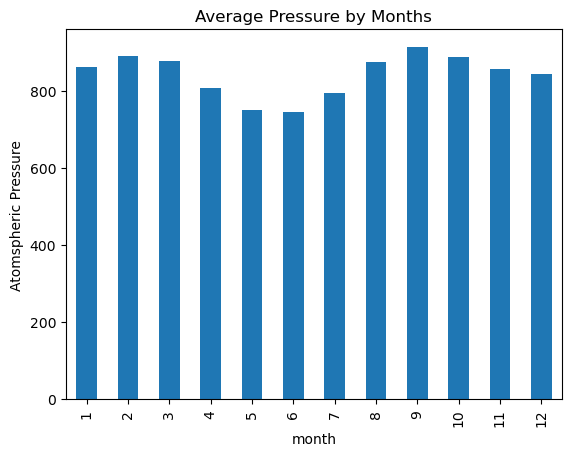

In [21]:
# Plot the average pressure by month
pressure.plot(kind = "bar")
plt.ylabel('Atomspheric Pressure')
plt.title('Average Pressure by Months')
plt.show()

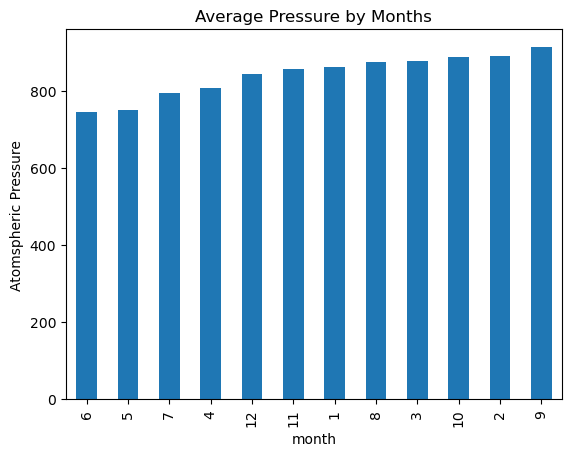

In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure.sort_values().plot(kind = "bar")
plt.ylabel('Atomspheric Pressure')
plt.title('Average Pressure by Months')
plt.show()

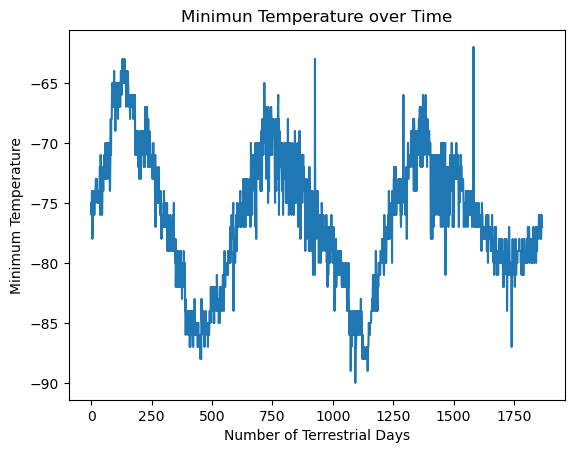

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_data_df['min_temp'].plot()
plt.ylabel('Minimum Temperature')
plt.xlabel('Number of Terrestrial Days')
plt.title('Minimun Temperature over Time')
plt.show()

#### Minimum Temperature

As you can see in the Minimum Temperature bar chart, we can see over 12 months that month 3 is the coldest and month 8 is the warmest.


#### Atmospheric Pressure

In the Atmospheric Pressure bar chart you can see that over 12 months month 6 has the lowest pressure and month 9 has the highest pressure.

#### Year Length

As you can see in the minimum temperature overtime that at its lowest it is around -89 and at its highest around -50. You can also see to spikes in temp with there line going upward above -65 temperature.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_data_df.to_csv('Mars_Temp_Data.csv')

In [25]:
browser.quit()